# Library import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [2]:
def get_font_family():
    import platform 
    system_name = platform.system()

    if system_name == "Darwin" : # 맥
        font_family = "AppleGothic"
    elif system_name == "Windows": # 윈도우
        font_family = "Malgun Gothic"
    else: # 리눅스 및 코랩
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv
        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        font_family = "NanumBarunGothic"
    return font_family

plt.style.use("seaborn") # 전체 그래프를 seaborn 스타일로 고정
plt.rc("font", family=get_font_family())
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에 마이너스 허용

%config InlineBackend.figure_format = 'retina' # 그래프를 더 선명하게 사용


plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 120
plt.rcParams.update({'font.size': 20})

# Data Load

In [3]:
regular = pd.read_csv("./data/Regular_Season_Batter_pre.csv")

In [4]:
regular.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,OBP,E,height/weight,year_born,OPS,외국인,weight,weight_category,age,age_category
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,0.383,9,177cm/93kg,1985,0.902,0,93.0,2.0,33,2
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0.000,1,180cm/72kg,1992,0.000,1,72.0,0.0,19,0
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,0.337,6,180cm/72kg,1992,0.686,1,72.0,0.0,22,0
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,0.348,15,180cm/72kg,1992,0.673,1,72.0,0.0,23,1
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,0.232,7,180cm/72kg,1992,0.489,1,72.0,0.0,24,1


In [5]:
# 결측치 존재
regular.isna().sum()

batter_id            0
batter_name          0
year                 0
team                 0
avg                 26
G                    0
AB                   0
R                    0
H                    0
2B                   0
3B                   0
HR                   0
TB                   0
RBI                  0
SB                   0
CS                   0
BB                   0
HBP                  0
SO                   0
GDP                  0
SLG                 26
OBP                 24
E                    0
height/weight      802
year_born            0
OPS                 26
외국인                  0
weight             802
weight_category    802
age                  0
age_category         0
dtype: int64

In [6]:
regular.dropna(inplace=True)

In [7]:
regular.drop(["batter_id", "batter_name", "height/weight", "year_born"], axis=1, inplace=True)

In [8]:
regular

,year,team,avg,G,AB,R,H,2B,3B,HR,...,GDP,SLG,OBP,E,OPS,외국인,weight,weight_category,age,age_category
0,2018,LG,0.339,50,183,27,62,9,0,8,...,3,0.519,0.383,9,0.902,0,93.0,2.0,33,2
1,2011,한화,0.000,2,1,0,0,0,0,0,...,0,0.000,0.000,1,0.000,1,72.0,0.0,19,0
2,2014,한화,0.221,41,86,11,19,2,3,1,...,1,0.349,0.337,6,0.686,1,72.0,0.0,22,0
3,2015,한화,0.257,120,311,50,80,7,4,2,...,3,0.325,0.348,15,0.673,1,72.0,0.0,23,1
4,2016,한화,0.158,46,101,16,16,3,2,1,...,5,0.257,0.232,7,0.489,1,72.0,0.0,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,2014,롯데,0.000,5,5,0,0,0,0,0,...,0,0.000,0.000,0,0.000,1,82.0,1.0,25,1
2450,2015,롯데,0.000,2,2,0,0,0,0,0,...,0,0.000,0.000,0,0.000,1,82.0,1.0,26,1
2451,2016,롯데,0.000,11,10,2,0,0,0,0,...,0,0.000,0.000,0,0.000,1,82.0,1.0,27,1
2452,2017,롯데,0.291,60,117,18,34,6,2,1,...,2,0.402,0.359,4,0.761,1,82.0,1.0,28,1


In [45]:
year_mean = regular.groupby("year")["avg"].mean()
obp_mean = regular.groupby("year")["OBP"].mean()[2:]
slg_mean = regular.groupby("year")["SLG"].mean()[2:]

In [37]:
obp_mean

year
2001    0.336100
2002    0.284733
2003    0.293045
2004    0.260394
2005    0.289833
2006    0.321220
2007    0.285480
2008    0.298677
2009    0.303108
2010    0.315104
2011    0.305044
2012    0.295899
2013    0.315815
2014    0.317015
2015    0.308539
2016    0.335736
2017    0.312379
2018    0.308500
Name: OBP, dtype: float64

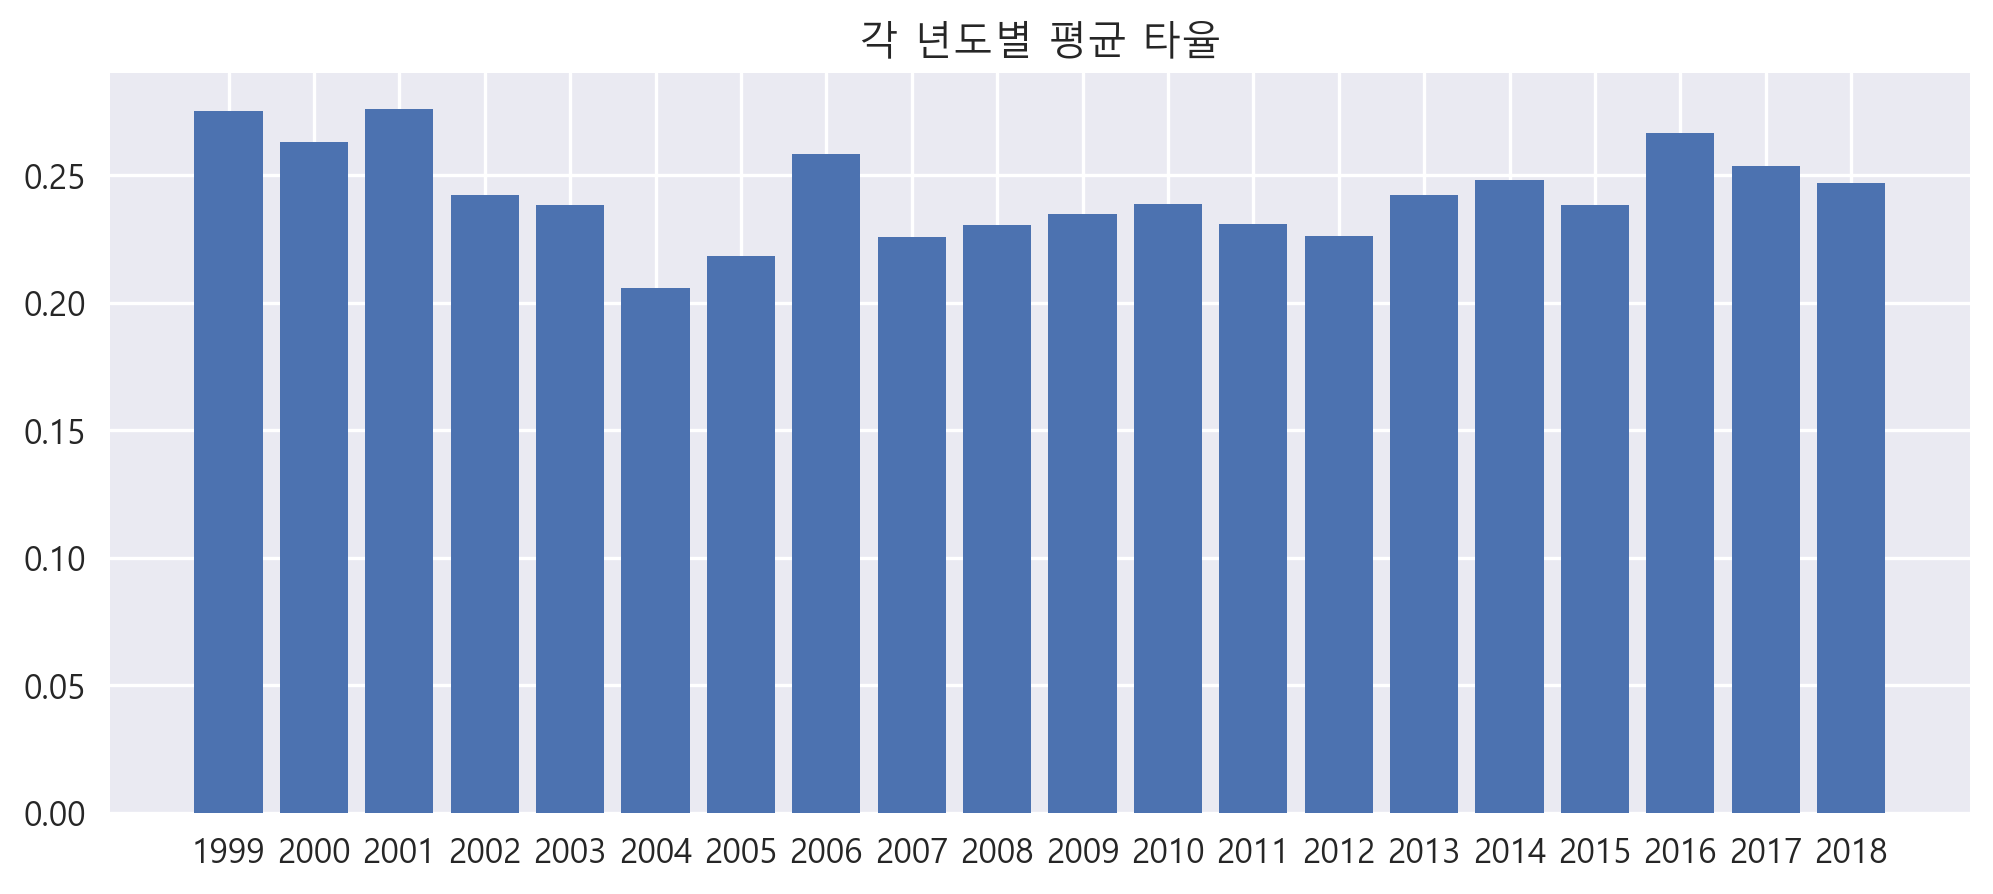

In [28]:
plt.figure(figsize=(10, 4))
plt.bar(x = year_mean.index, height = year_mean.values)
plt.xticks(range(1999, 2019, 1))

plt.title("각 년도별 평균 타율")

plt.show()

- 평균타율을 통하여 각 년도별로 확인을 해보았을 때, 2004년 같은 경우에는 투고타저이고 1999년 같은경우에는 타고투저임을 확인 할 수 있다.

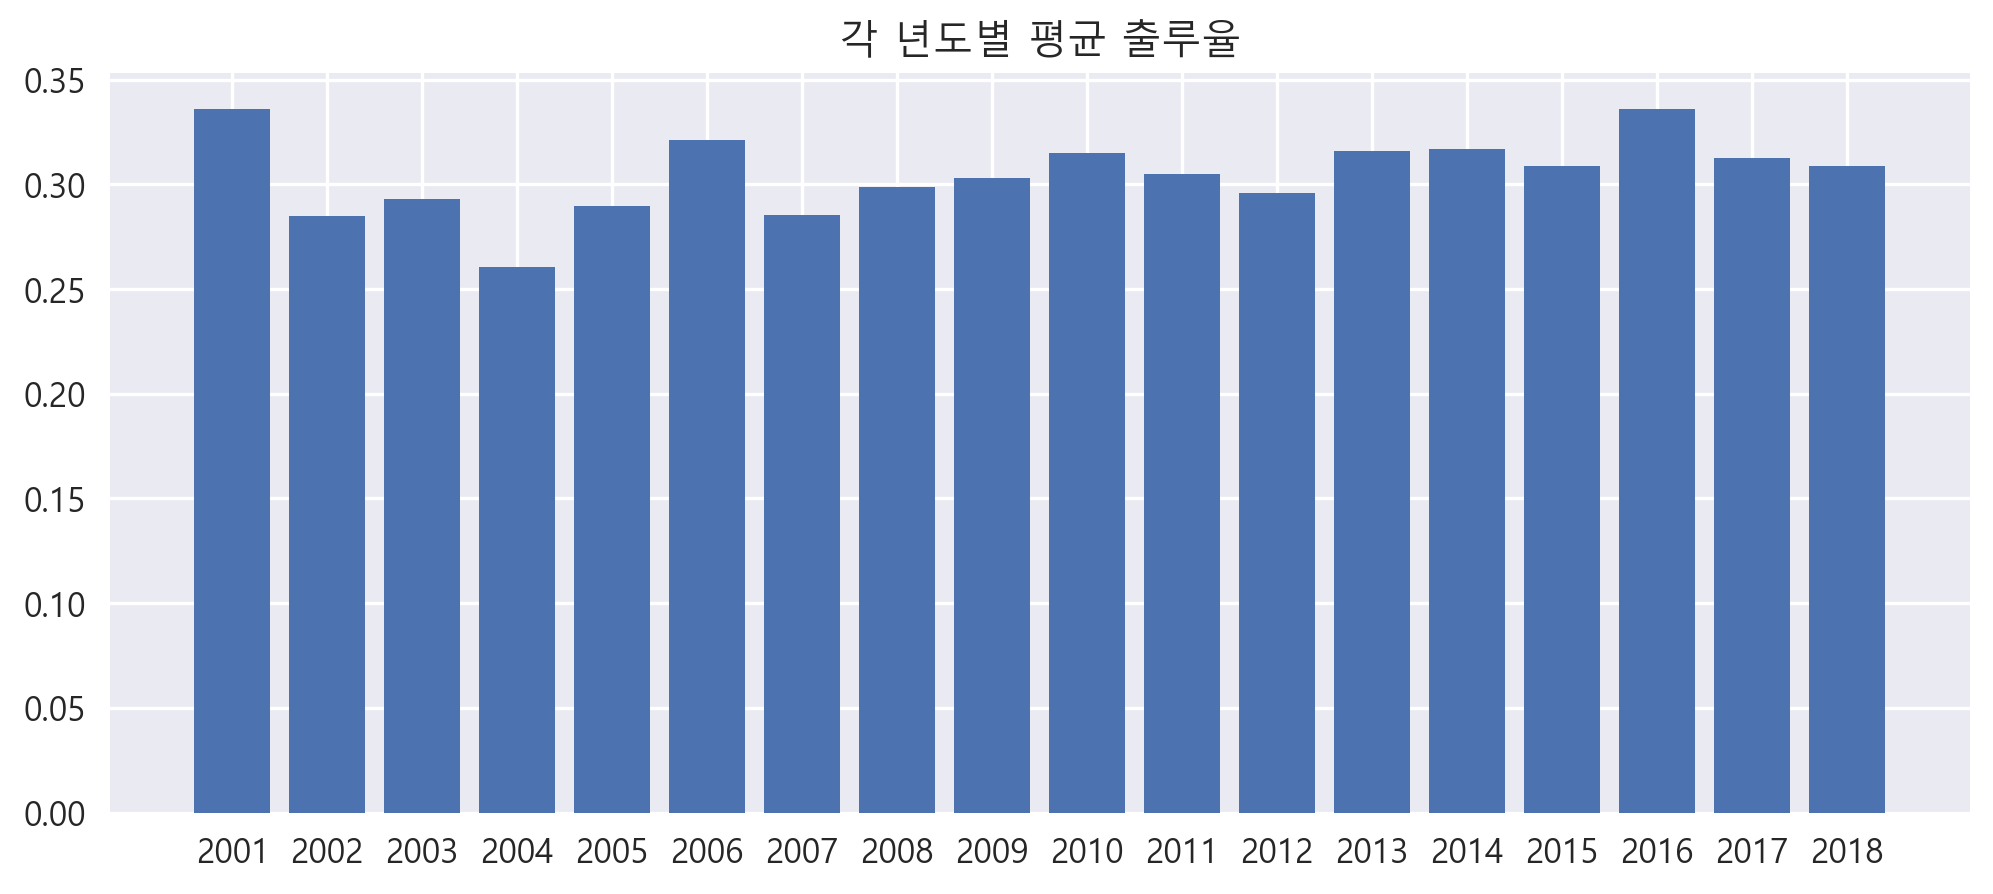

In [39]:
plt.figure(figsize=(10, 4))
plt.bar(x = obp_mean.index, height = obp_mean.values)
plt.xticks(range(2001, 2019, 1))

plt.title("각 년도별 평균 출루율")

plt.show()

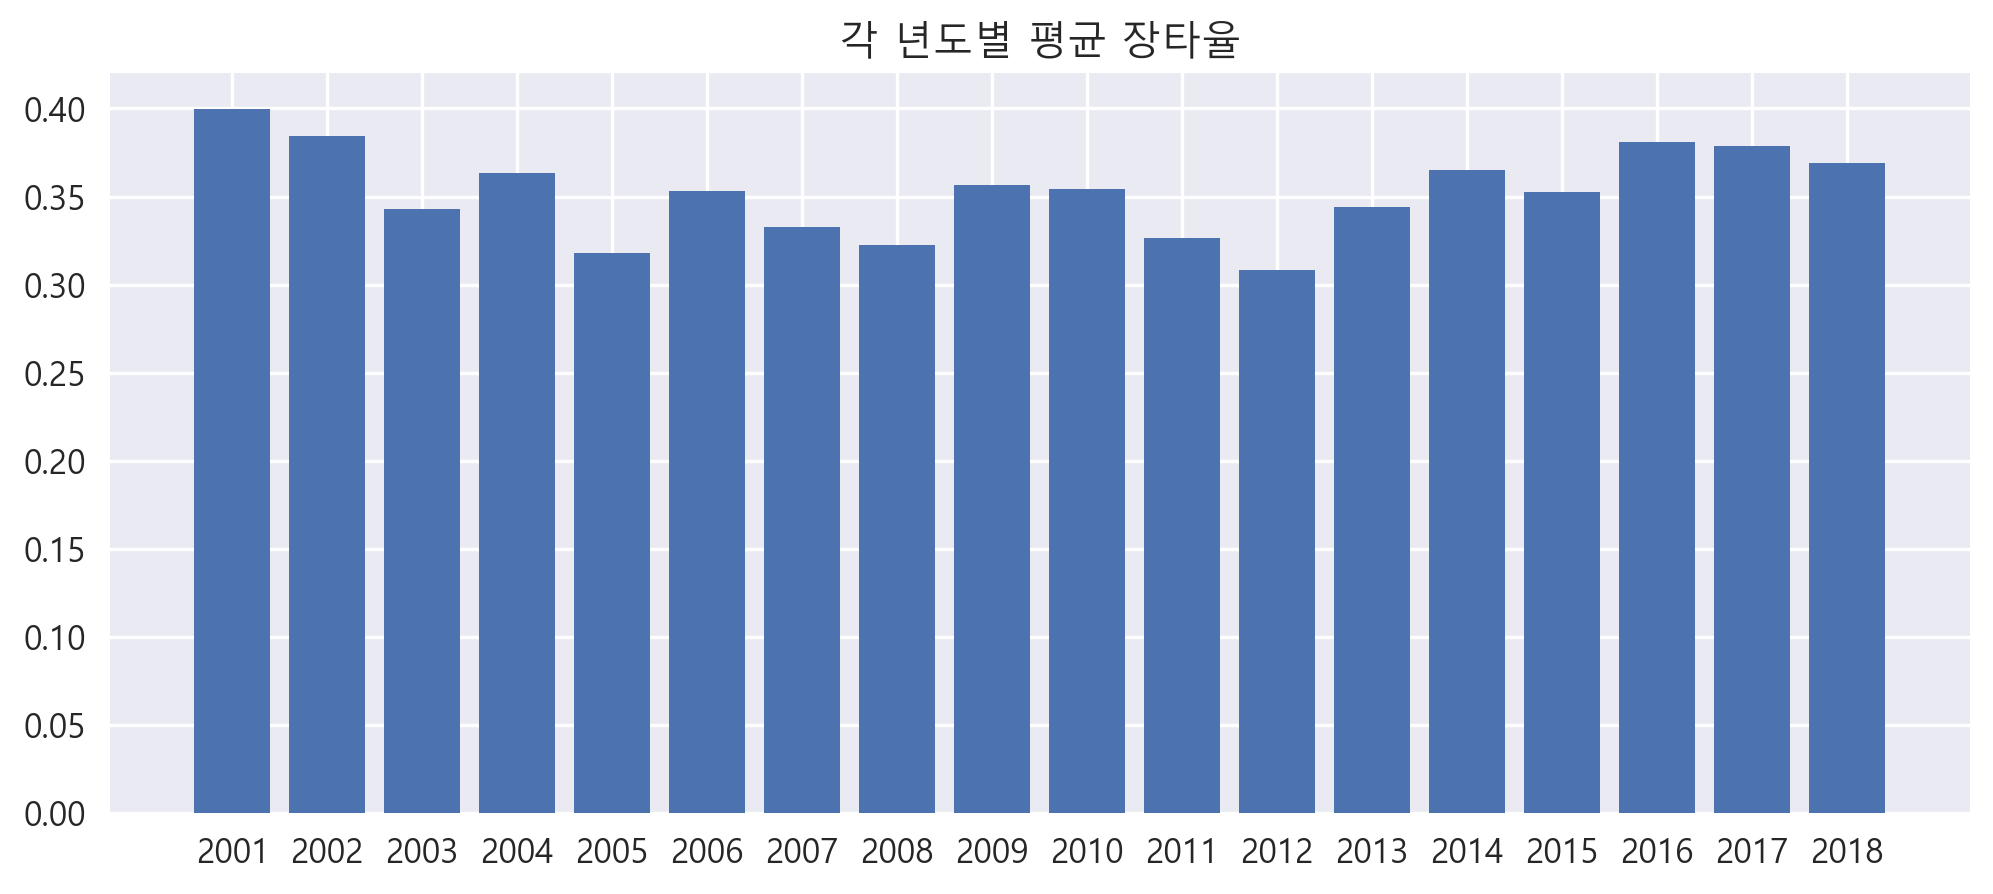

In [47]:
plt.figure(figsize=(10, 4))
plt.bar(x = slg_mean.index, height = slg_mean.values)
plt.xticks(range(2001, 2019, 1))

plt.title("각 년도별 평균 장타율")

plt.show()

- OPS에 영향을 미치는 장타율과 출루율을 확인해보면 장타율과 출루율이 비슷한 양상으로 상승하는 것을 확인 할 수 있다. 

In [16]:
regular.corr().loc["OPS"].sort_values(ascending=False)[1:]

SLG                0.971638
OBP                0.934245
avg                0.915156
TB                 0.574220
RBI                0.561792
H                  0.552947
R                  0.541595
2B                 0.538087
AB                 0.529803
BB                 0.527559
G                  0.514421
HR                 0.510431
SO                 0.496169
GDP                0.449083
HBP                0.416355
age                0.275245
E                  0.255613
3B                 0.249906
age_category       0.247076
CS                 0.246401
SB                 0.203898
weight             0.199282
weight_category    0.171190
year               0.099227
외국인               -0.088587
Name: OPS, dtype: float64

<AxesSubplot: >

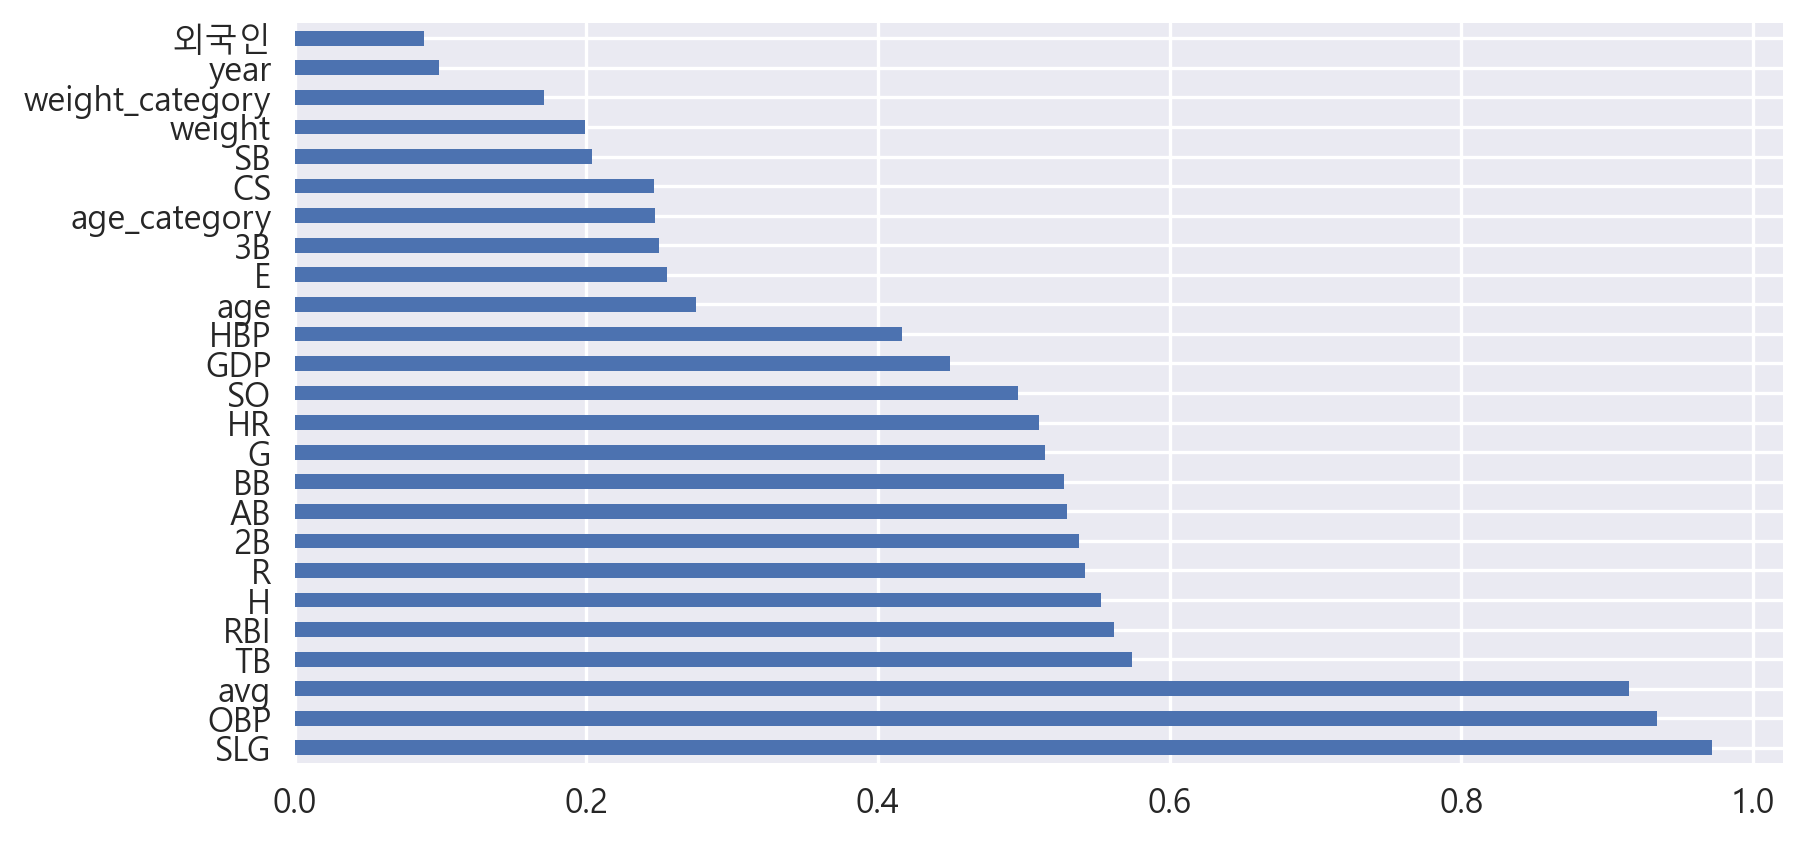

In [23]:
abs(regular.corr().loc["OPS"]).sort_values(ascending=False)[1:].plot(kind = "barh")

- OPS와 가장 높은 상관관계가 존재하는 항목들을 살펴보았을 때, 출루율과 장타율이 가장 높게 나타났고 출루율에 영향을 미치는 타율이 그다음 영향이 매우 높게 나타났다.
- 0.2 이하로 영향을 미치는 도루 실패 및 몸무게 해당 연도 그리고 외국인인지 아닌지 여부는 낮게 나타나고 있다.

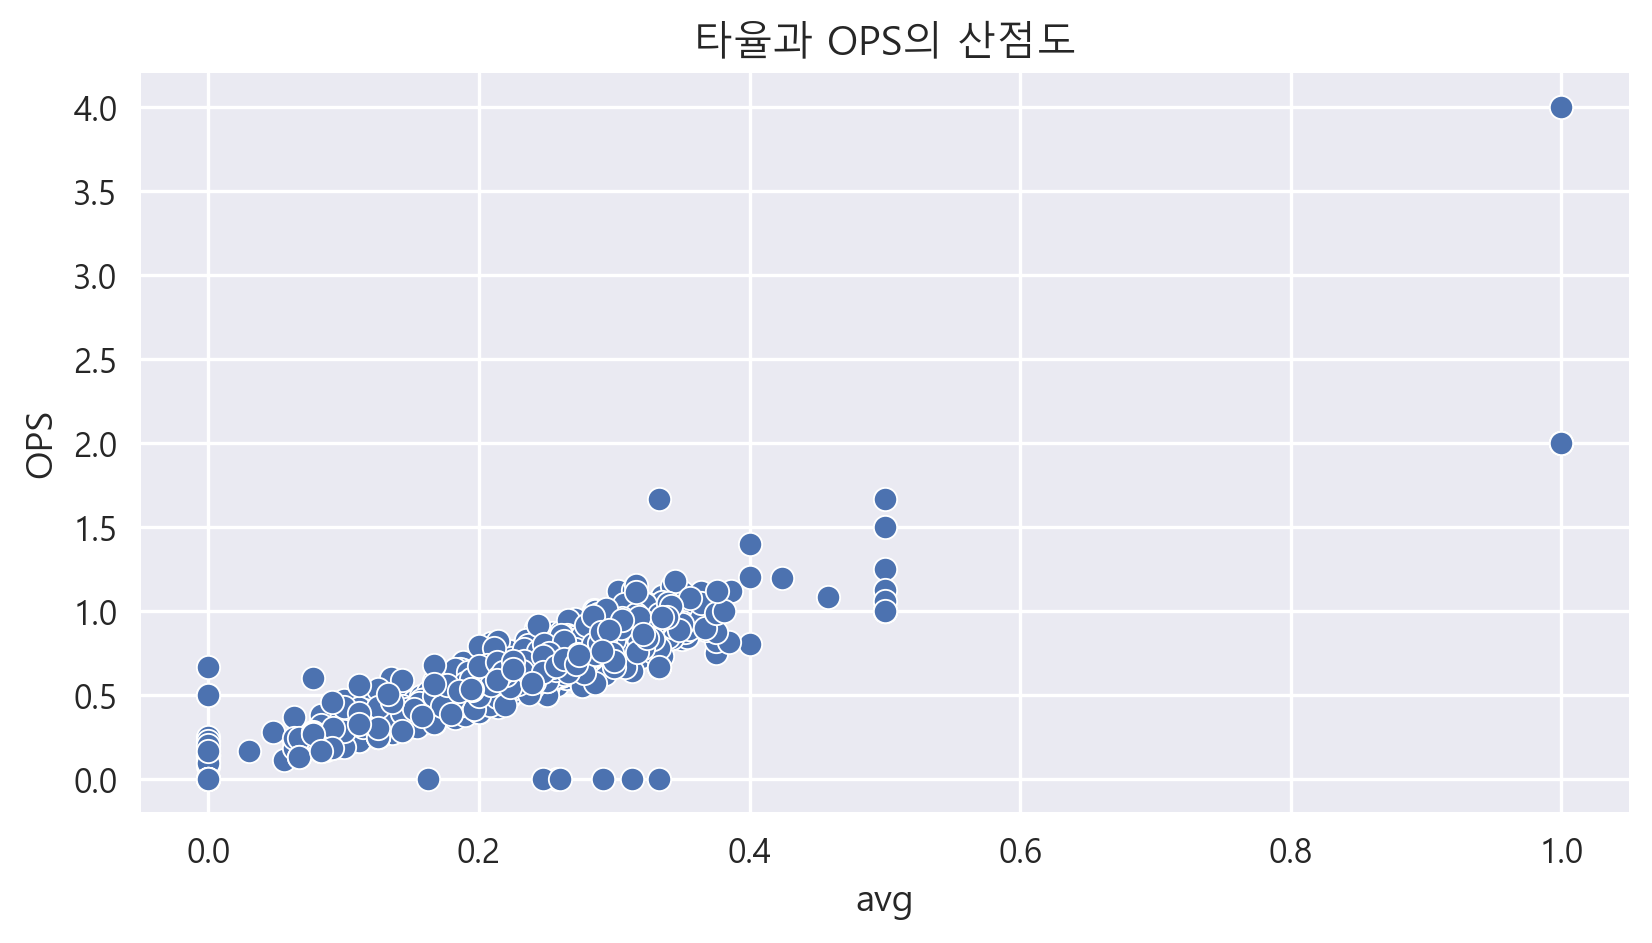

In [25]:
plt.figure()
sns.scatterplot(x = "avg", y = "OPS", data=regular)

plt.title("타율과 OPS의 산점도")
plt.show()

- 위의 산점도를 통하여 타율이 1.0 즉 10할이면서 OPS가 2.0혹은 4.0인 데이터들이 있는 것을 확인하였다.
- 하지만 현실적으로 타율이 10할은 불가능하고 심지어 타율이 4할만 넘어가도 데이터가 이상한 데이터라고 확인 할 수 있다.
  - 현재, KBO기준 정규 타석을 완수하고 타율을 4할을 넘긴 타자는 82년도 MBC 백인천 선수 뿐이다.
- 이상치 제거가 필요하다.

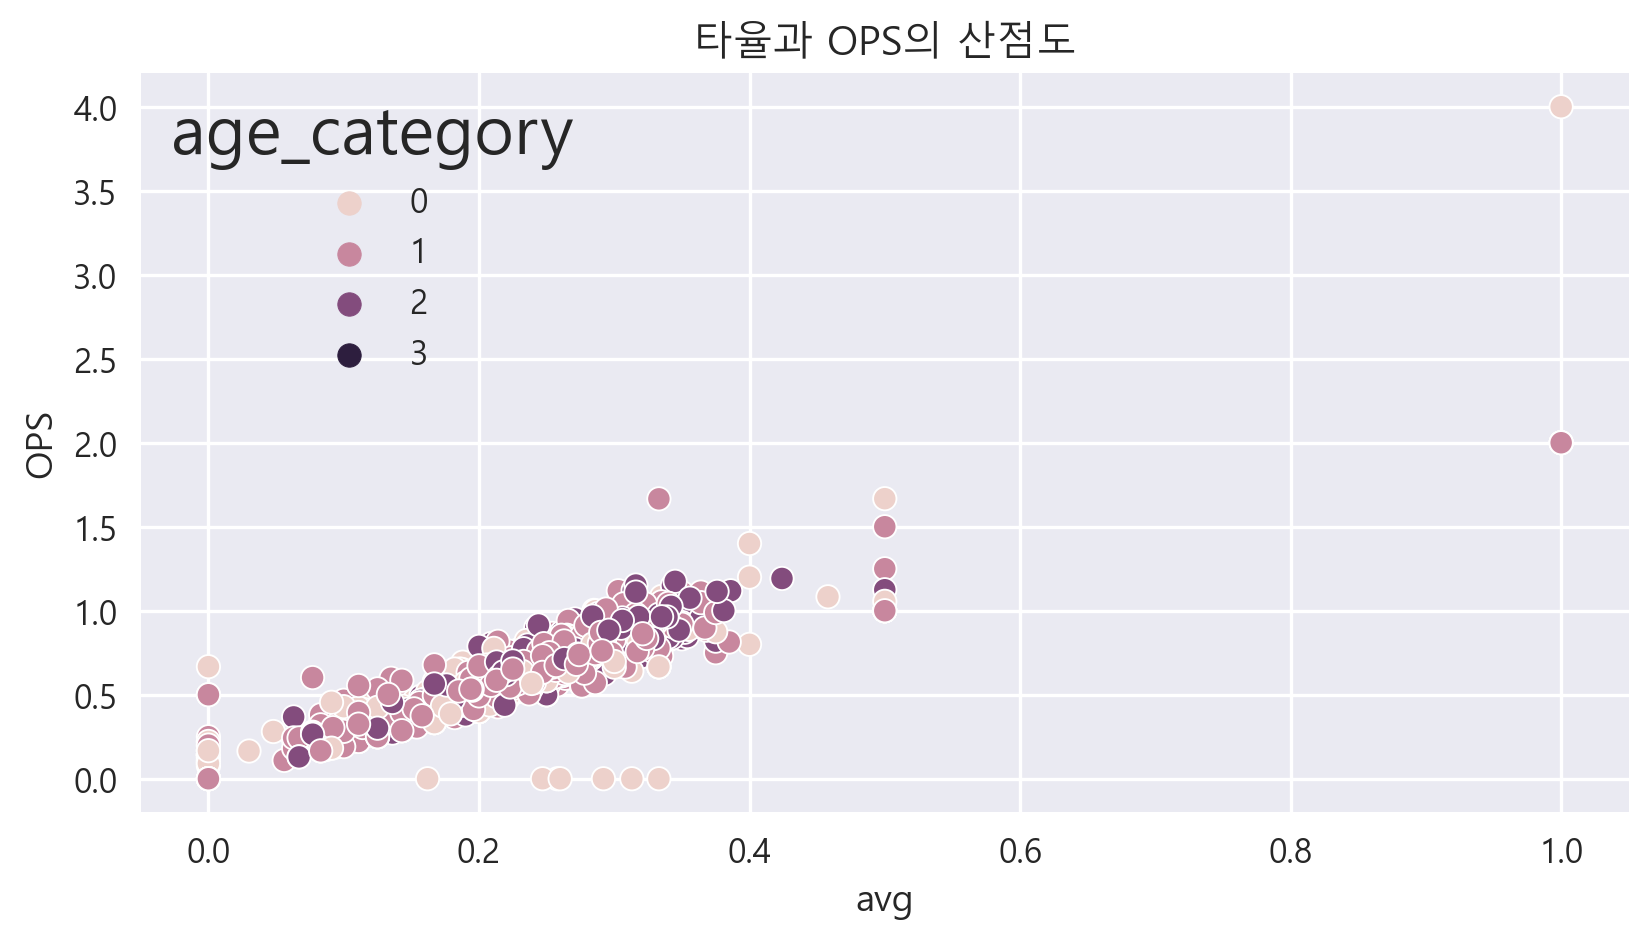

In [27]:
plt.figure()
sns.scatterplot(x = "avg", y = "OPS", hue="age_category",data=regular)

plt.title("타율과 OPS의 산점도")
plt.show()

- 상관관계가 그나마 높은 나이 범주별로 묶어서 산점도를 그려보았을 때, 0 혹은 1 선수들이 이상치 인것을 확인할 수 있다.
- 즉, 젊은 선수(신인 선수)들이 정규 타석이 아닌 소수의 타석으로 타율이 높게 나타난 것을 확인 할 수 있다.

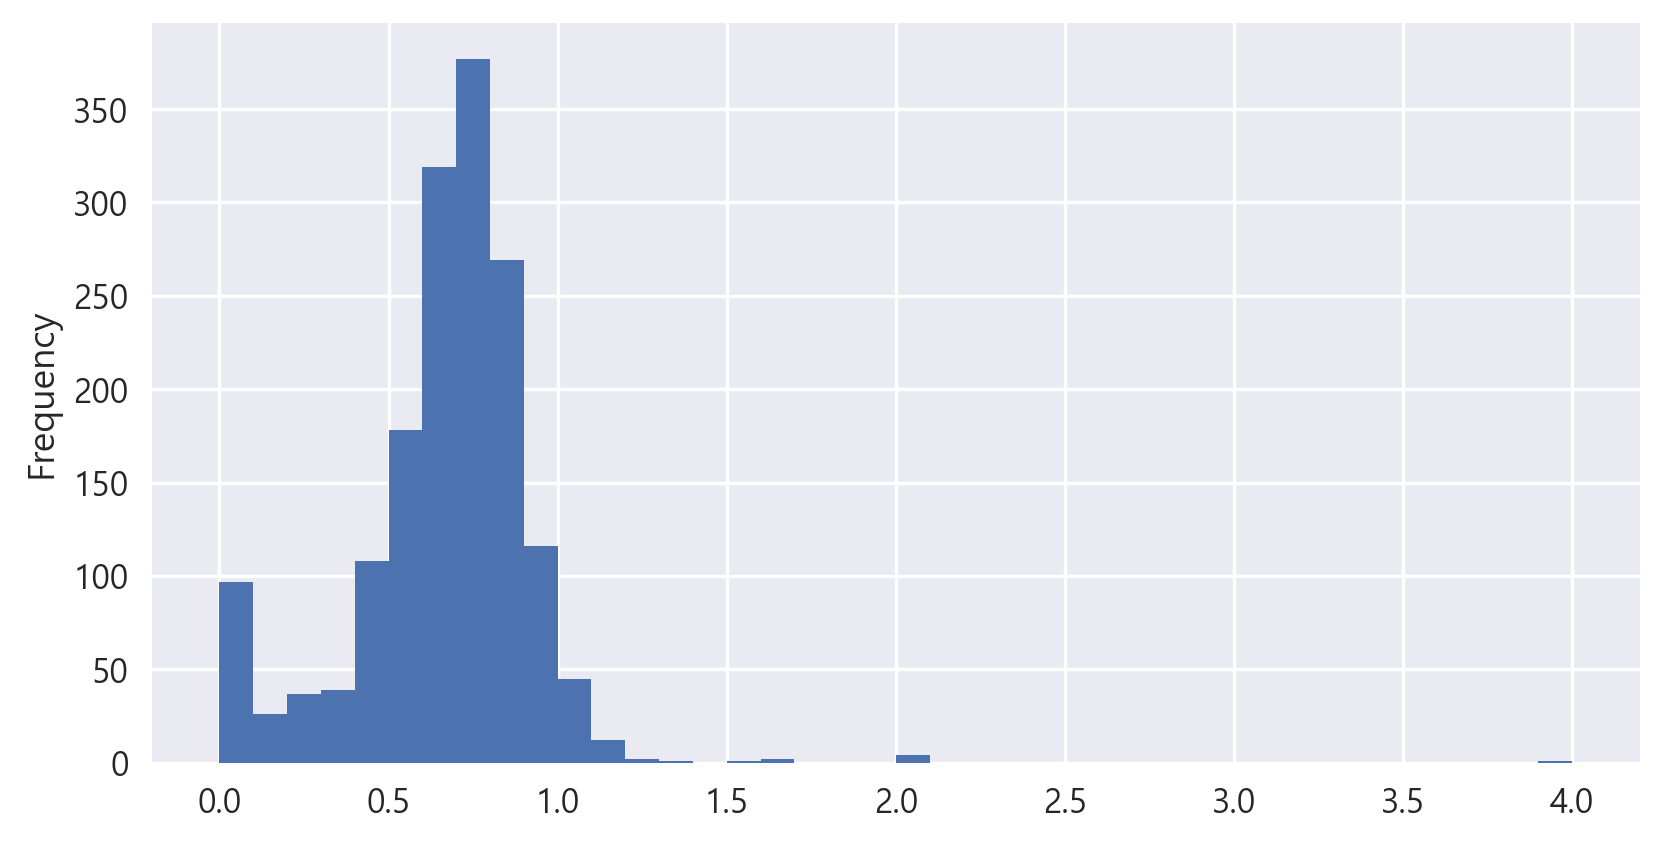

In [33]:
regular["OPS"].plot(kind="hist", bins=40)
plt.show()

- 박스 플롯의 IQR 범위의 밖의 데이터들을 제거함

In [56]:
avg_iqr = np.subtract(*np.quantile(regular["avg"], [0.75, 0.25])) # np.quantile(regular["avg"], 0.75) - np.quantile(regular["avg"], 0.25)

avg_iqr

0.086

In [57]:
df = regular.copy()

In [71]:
df = df[(df["avg"] <= (np.quantile(df["avg"], 0.75) + avg_iqr*1.5)) | (df["avg"] >= (np.quantile(df["avg"], 0.25) - avg_iqr*1.5))]

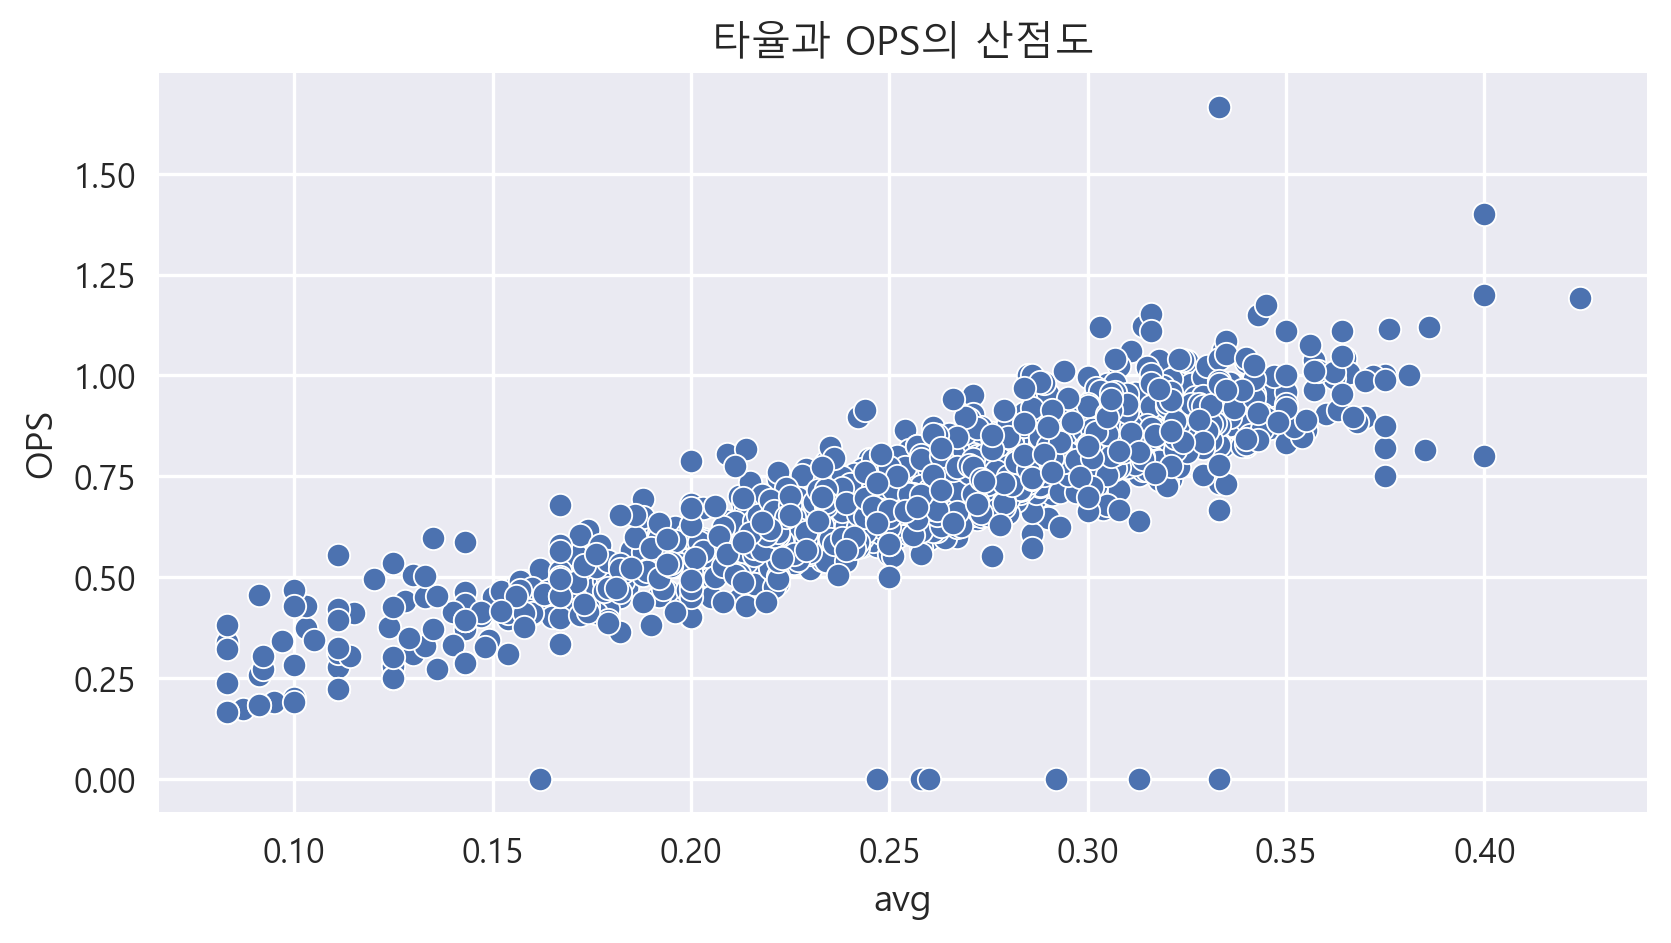

In [72]:
plt.figure()
sns.scatterplot(x = "avg", y = "OPS", data=df)

plt.title("타율과 OPS의 산점도")
plt.show()

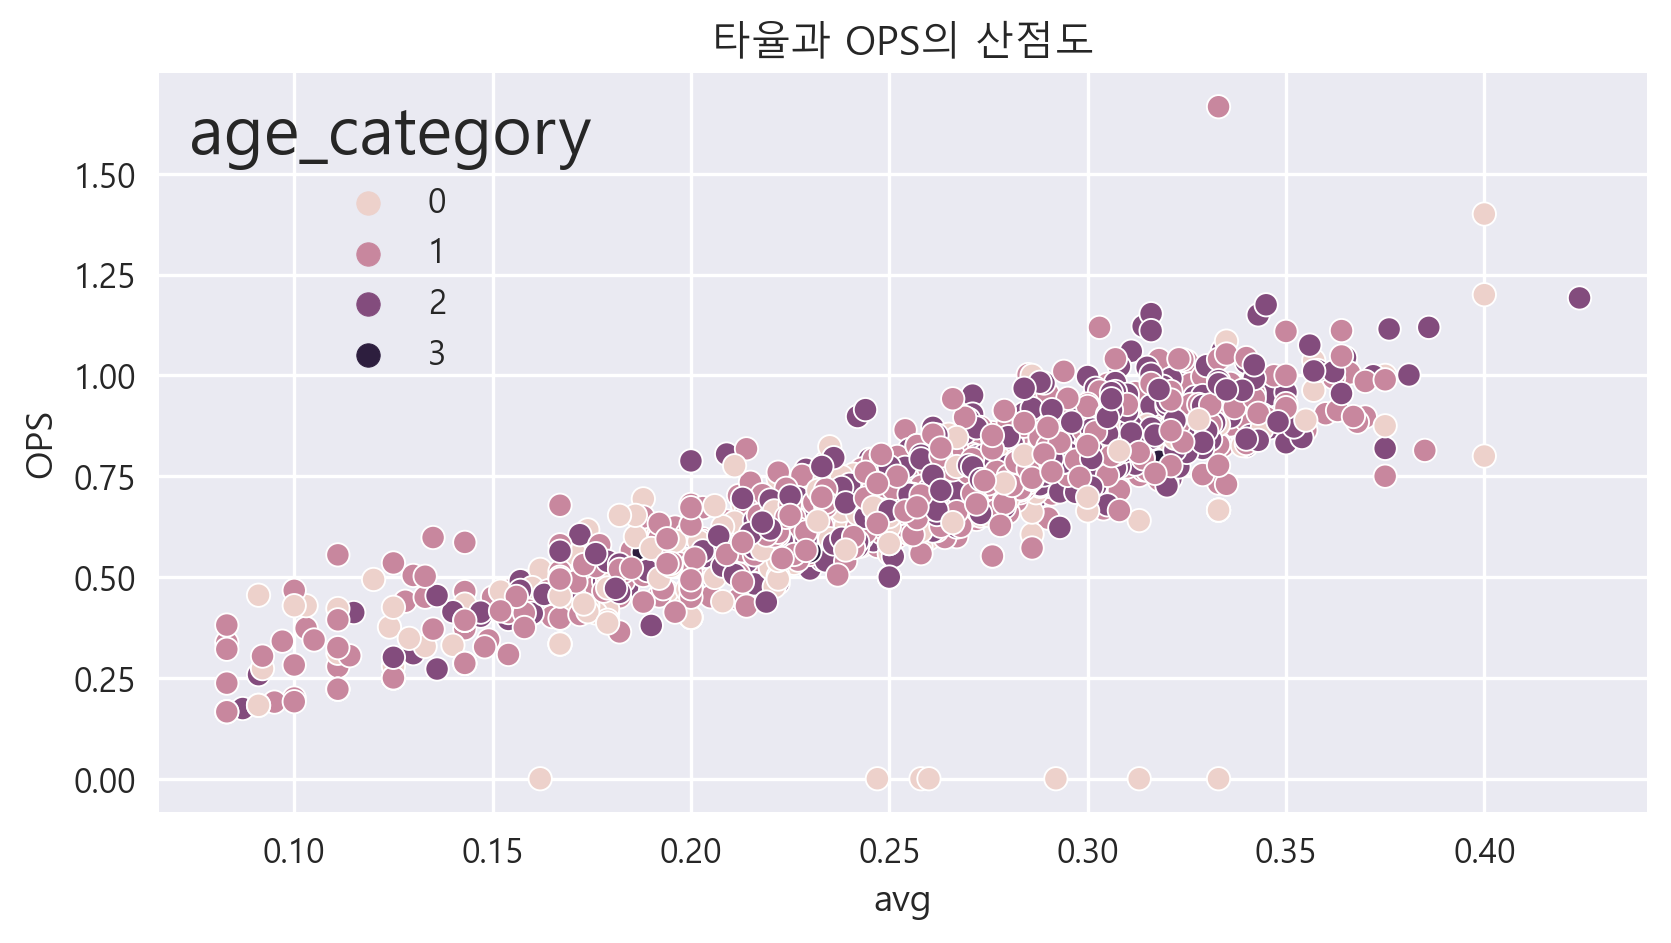

In [73]:
plt.figure()
sns.scatterplot(x = "avg", y = "OPS", hue="age_category",data=df)

plt.title("타율과 OPS의 산점도")
plt.show()

<AxesSubplot: >

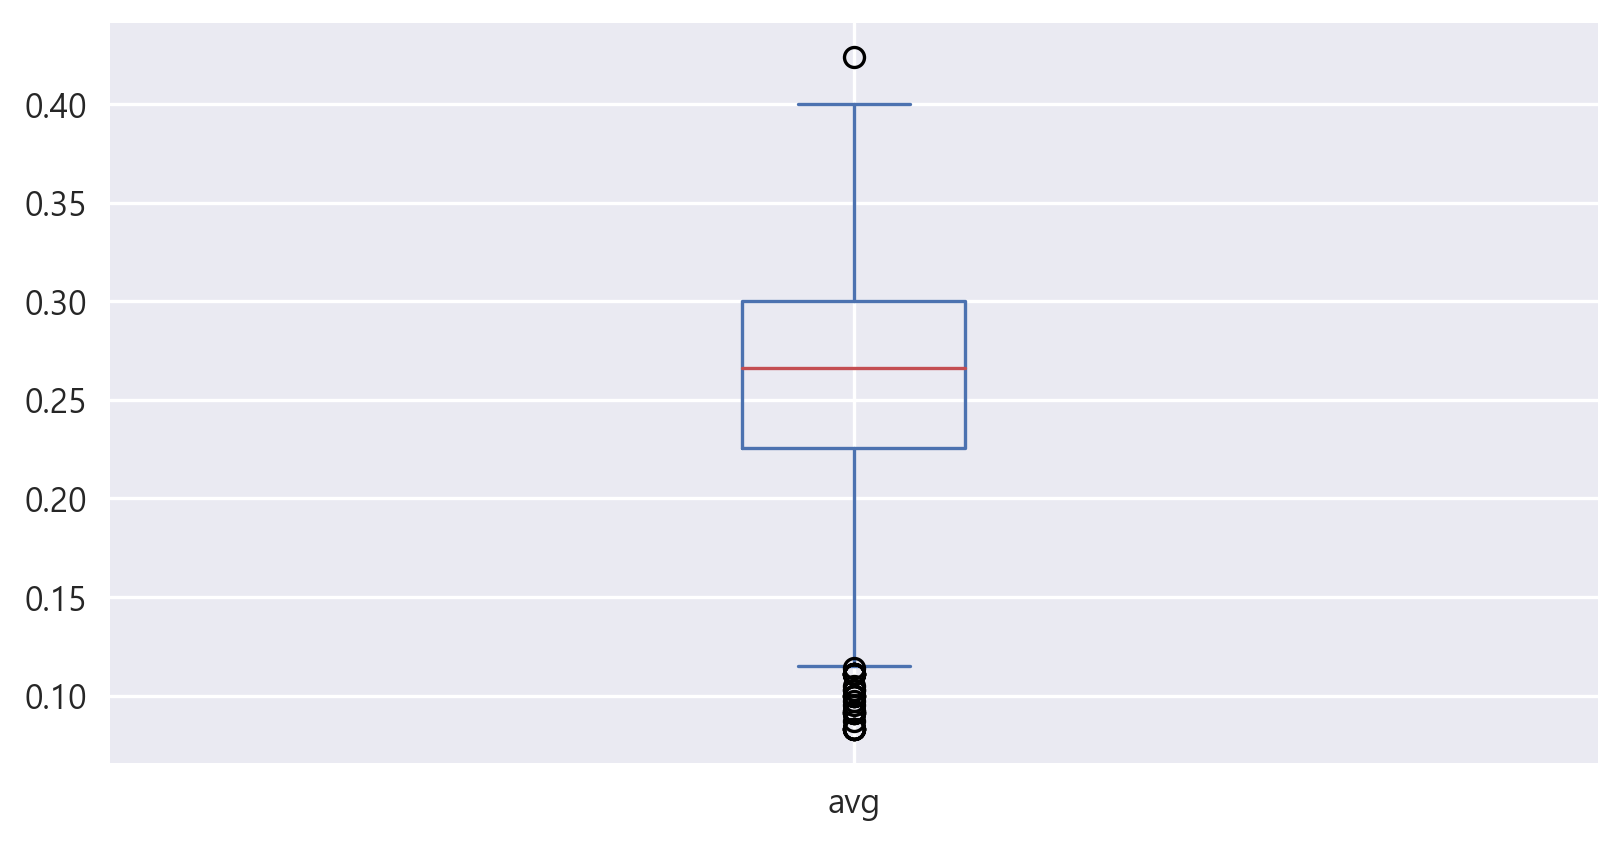

In [74]:
df["avg"].plot(kind="box")

<AxesSubplot: ylabel='Frequency'>

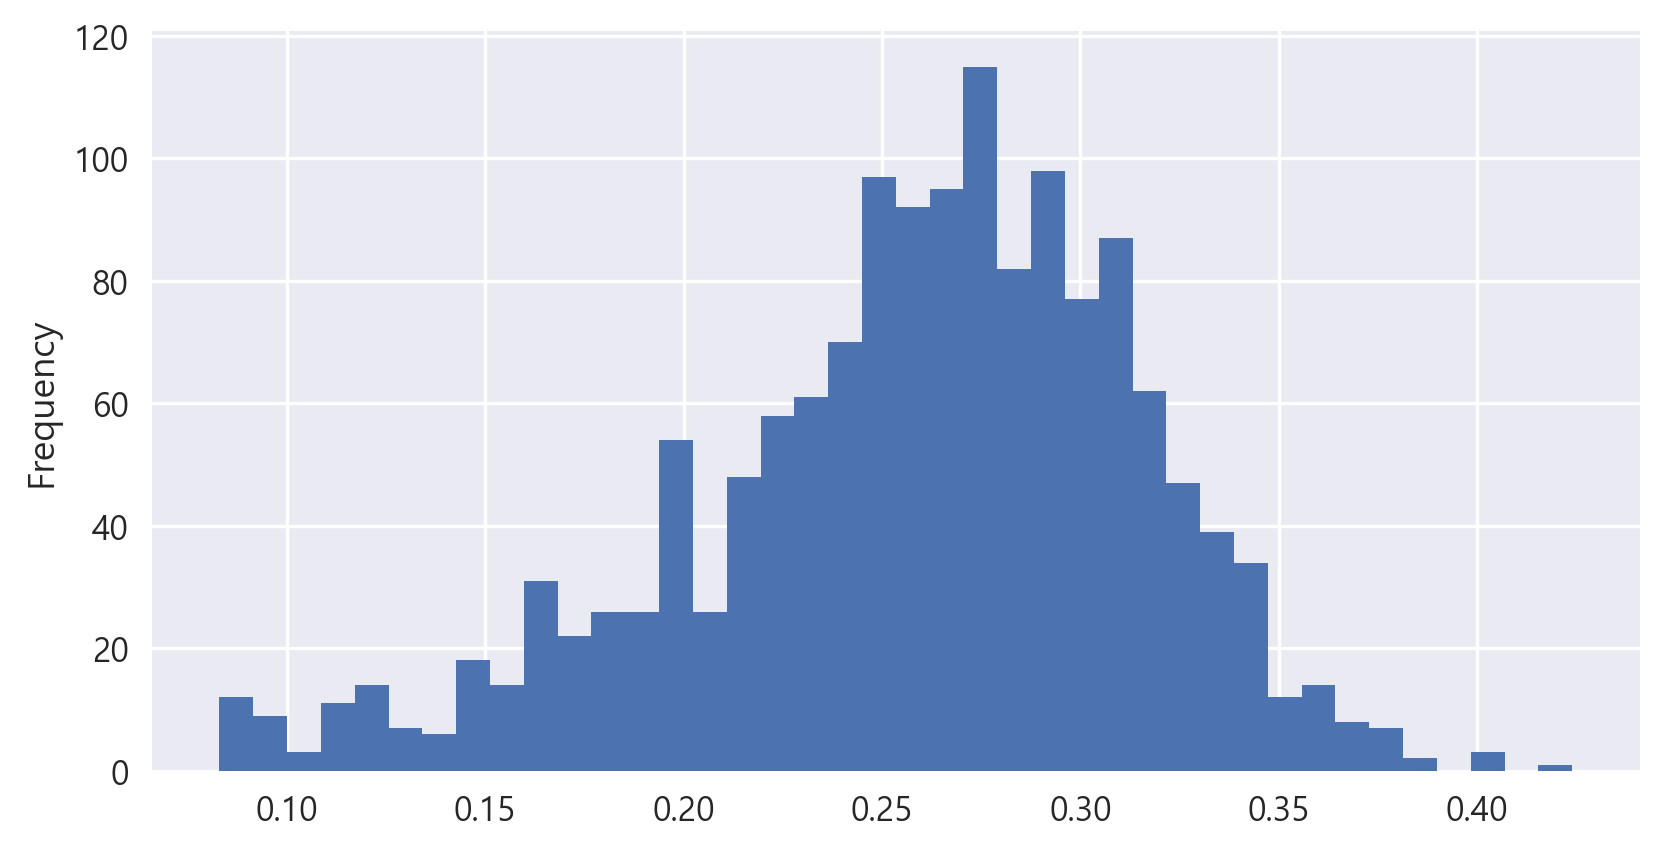

In [77]:
df["avg"].plot(kind="hist", bins=40)

- 대체로 평균타율이 2할과 3할 사이에 분포하는 것을 확인할 수 있다.

- BABIP (인플레이타구타율)
  - BABIP (Batting Average on Balls In Play)는 인플레이 타구중에서 안타가 된 비율을 의미합니다. 인플레이 타구란 타자가 투구를 쳐낸 결과 중에서 파울, 희생 번트, 홈런을 제외한 것을 말합니다.
  - BABIP이라는 지표는 수비가 아닌(불특정 팀을 상대하는 것이 아닌) 운과 타자의 능력만 보는 지표이기 때문에 OPS에 영향을 미칠 것 같아서 추가를 한다.

- 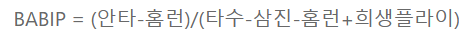

In [79]:
# (df["H"] - df["HR"]) / (df["AB"] - df["SO"] - df["H"] + df["Sac fly"])
# 희생플라이 데이터가 없기에 babip계산 불가